## k-means Example

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 16})

### Make some sample data
- Make synthetic 2D data with 4 'real' clusters

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

#### Scatterplot of sample data

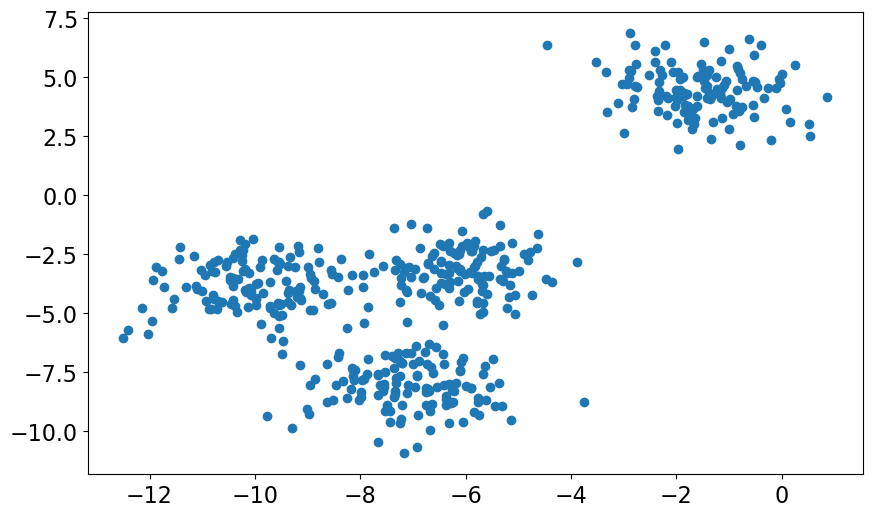

In [3]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1]);

### Perform clustering, and keep track of RSS to use 'Elbow' method to find optimal value of K

In [8]:
from sklearn.cluster import KMeans
ncluster_list = range(1,10)

def kmean_score(nclust):
    km = KMeans(n_clusters = nclust, 
                init = 'random', 
                n_init = 10, 
                max_iter = 300, 
               # n_jobs = -1
               ) #look at hyperparameters
    km.fit(X)
    rss = -km.score(X)
    return rss

scores = [kmean_score(i) for i in range(1,10)]
print("#clust\trss")
for i, score in enumerate(scores):
    print("{0}\t{1:0.0f}".format(ncluster_list[i],score))

C:\Users\Smith\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


#clust	rss
1	15768
2	3735
3	1903
4	908
5	817
6	736
7	650
8	576
9	531


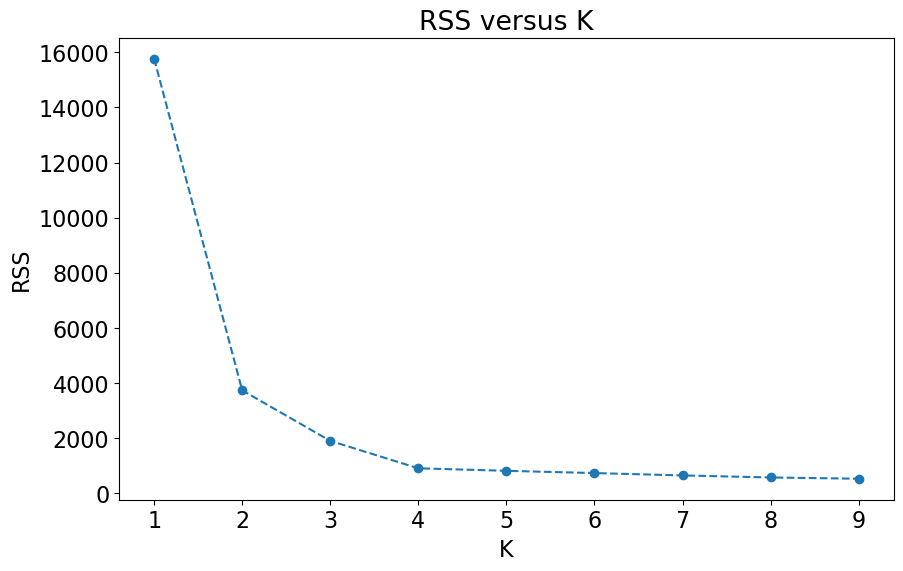

In [9]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(range(1,10), scores, 'o--')
ax.set_xlabel('K')
ax.set_ylabel('RSS')
ax.set_title('RSS versus K');

### A better option: use Silhouette scores to find optimal value of K

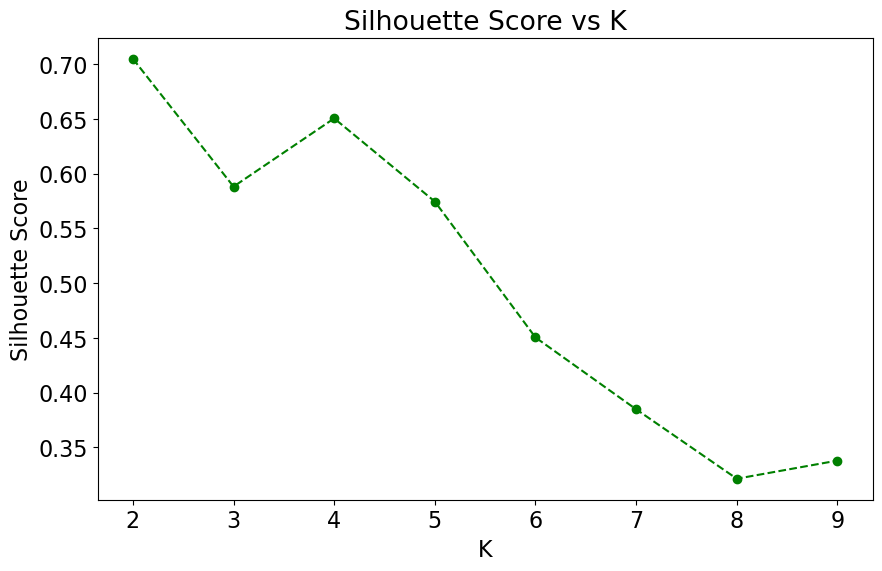

In [10]:
from sklearn.metrics import silhouette_score

def get_silhouette_score(nclust):
    km = KMeans(nclust)
    km.fit(X)
    sil_avg = silhouette_score(X, km.labels_)
    return sil_avg

sil_scores = [get_silhouette_score(i) for i in range(2,10)]
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(range(2,10), sil_scores, 'o--', c = 'g')
ax.set_xlabel('K')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Score vs K');

Silhoutte scores range from 1 (tight, non-overlapping clusters) to 0 (overlapping clusters) to -1 (datapoints likely assigned to the wrong clusters).

In the figure above large silhouette scores occur at 2 and 4 clusters.

### Silhouette Plots provide even more detail about each clustering

For n_clusters = 2 the average silhouette score is 0.705.


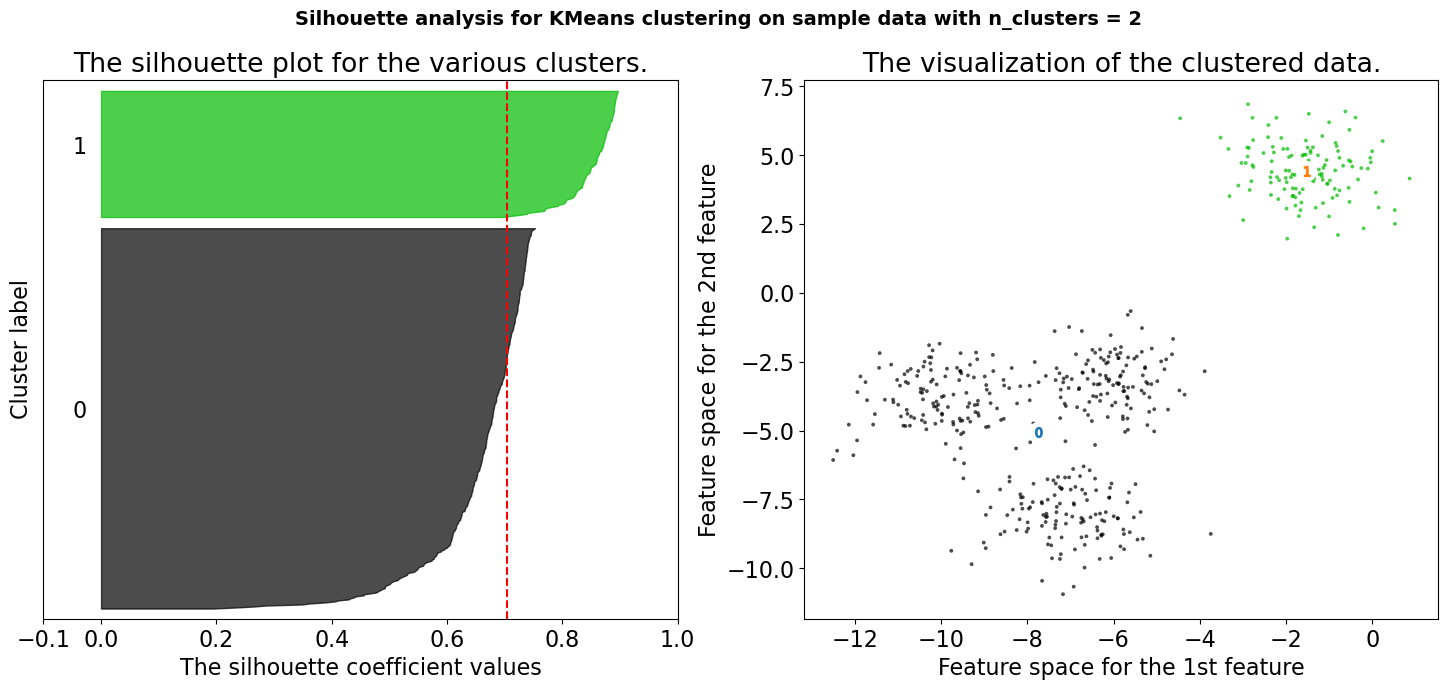

For n_clusters = 3 the average silhouette score is 0.588.


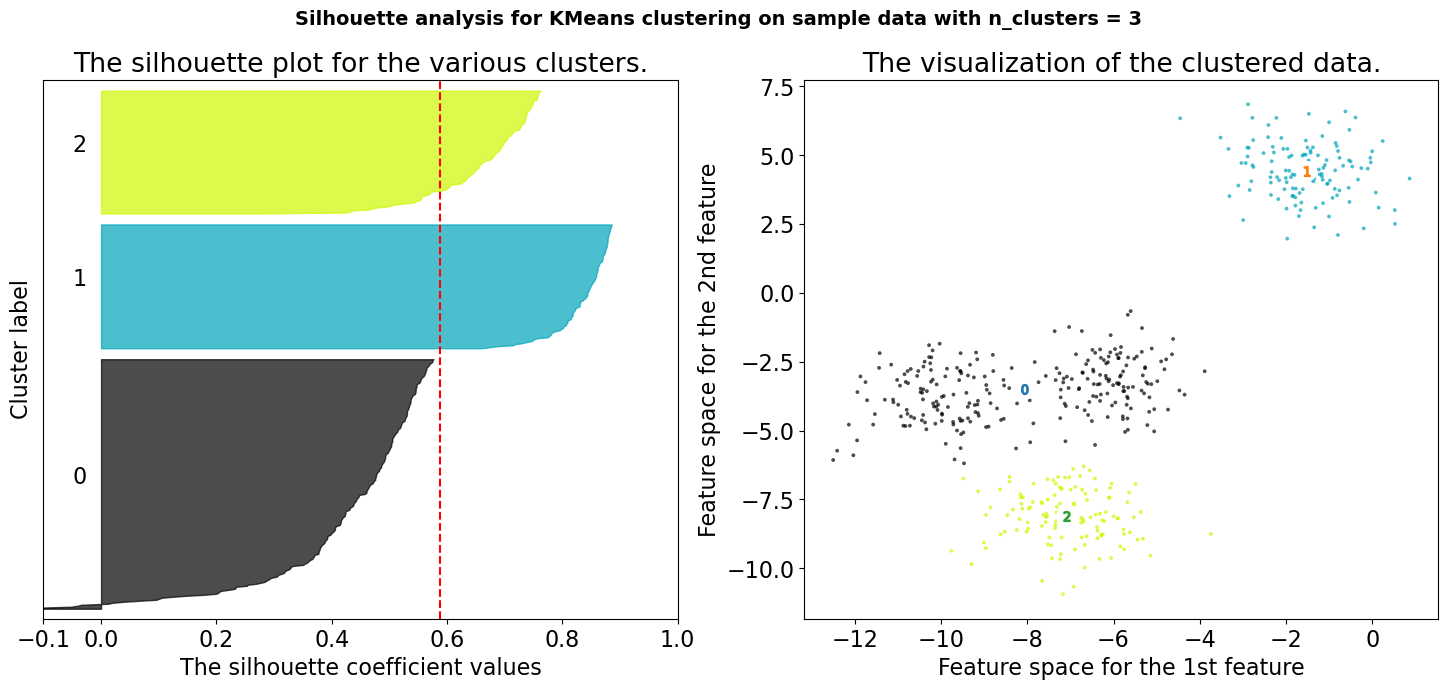

For n_clusters = 4 the average silhouette score is 0.651.


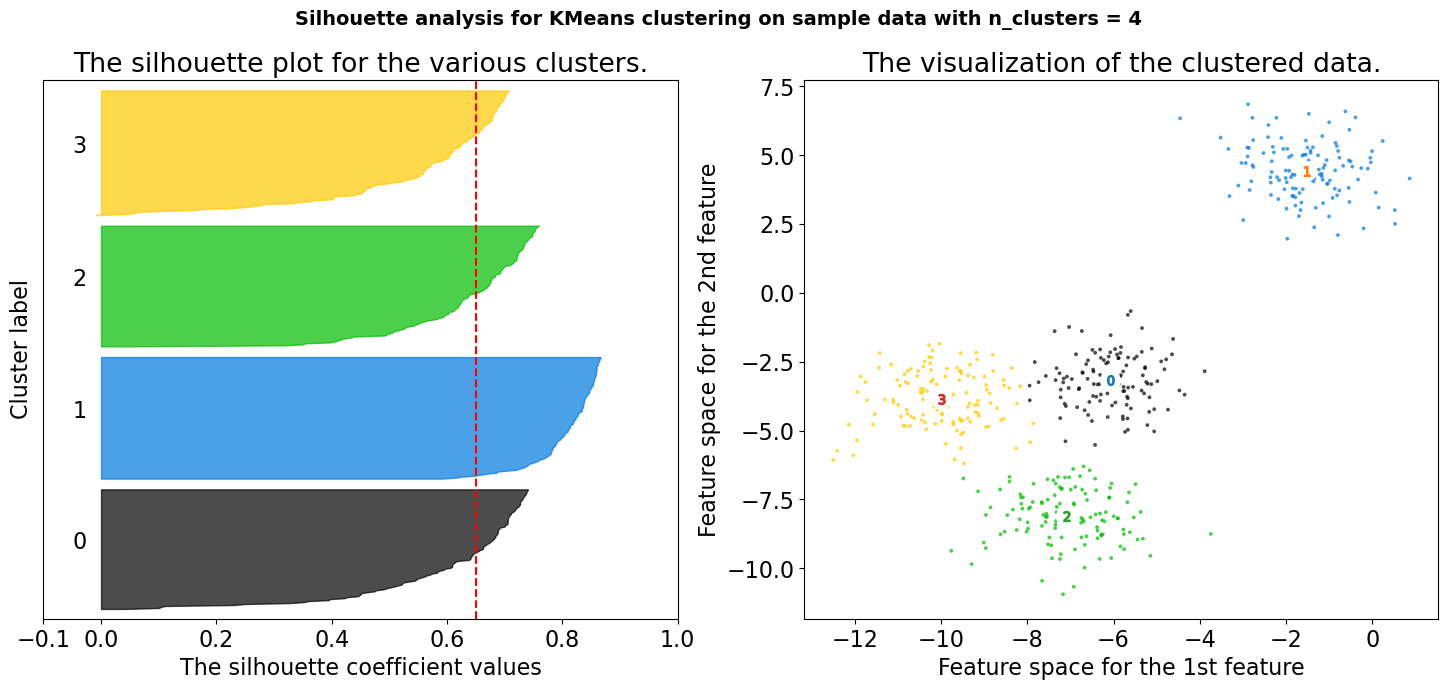

For n_clusters = 5 the average silhouette score is 0.564.


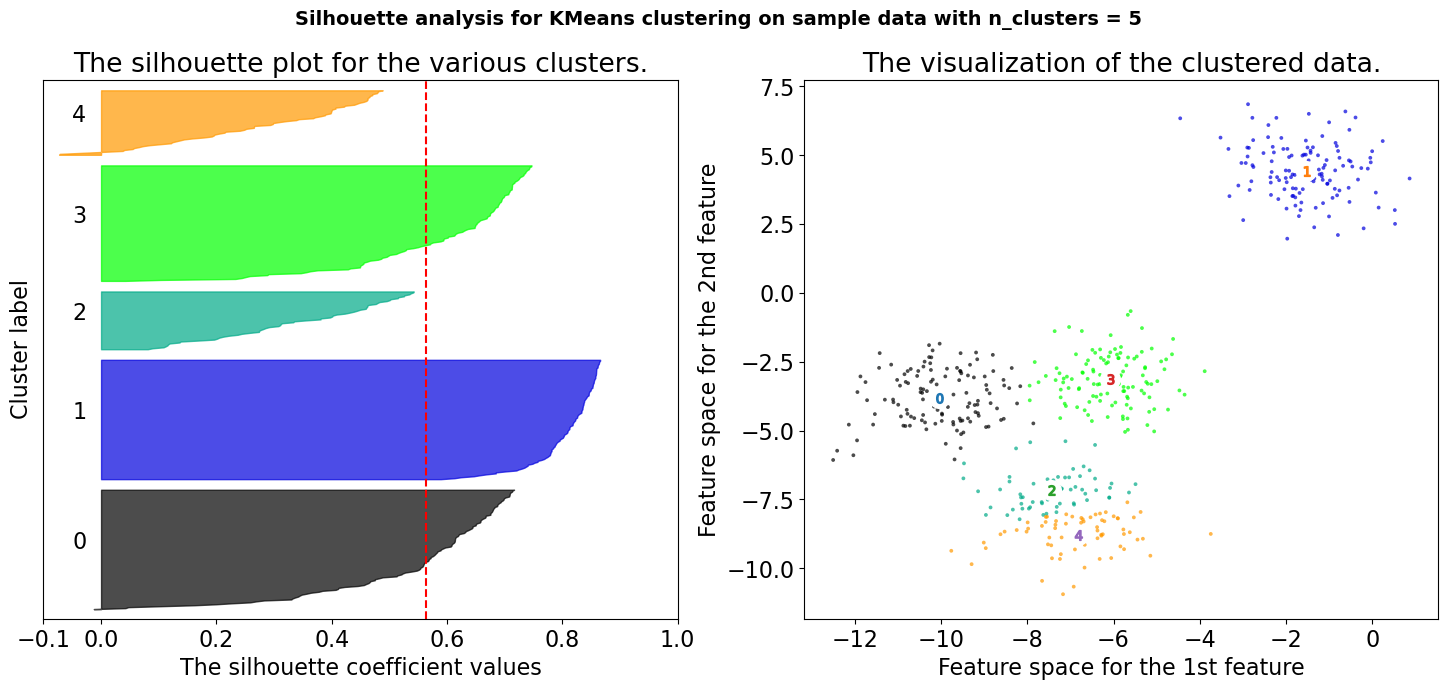

For n_clusters = 6 the average silhouette score is 0.450.


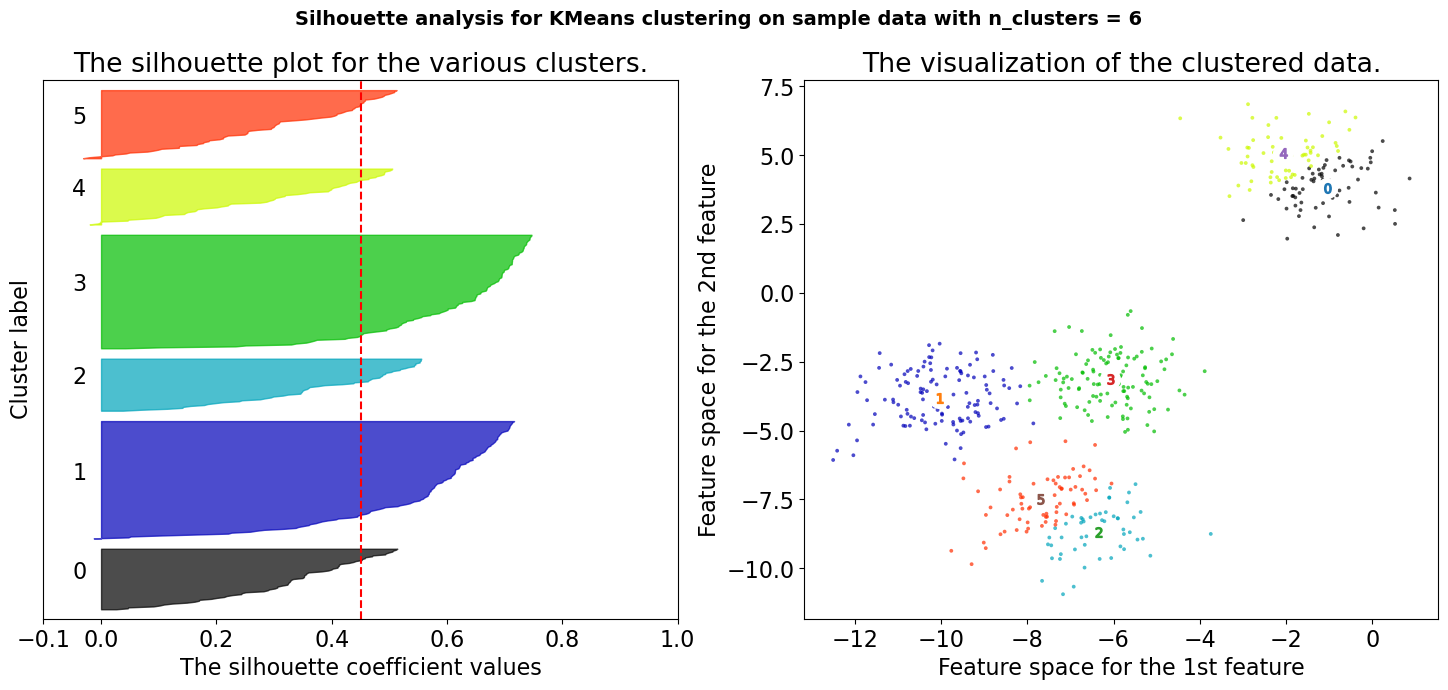

For n_clusters = 7 the average silhouette score is 0.391.


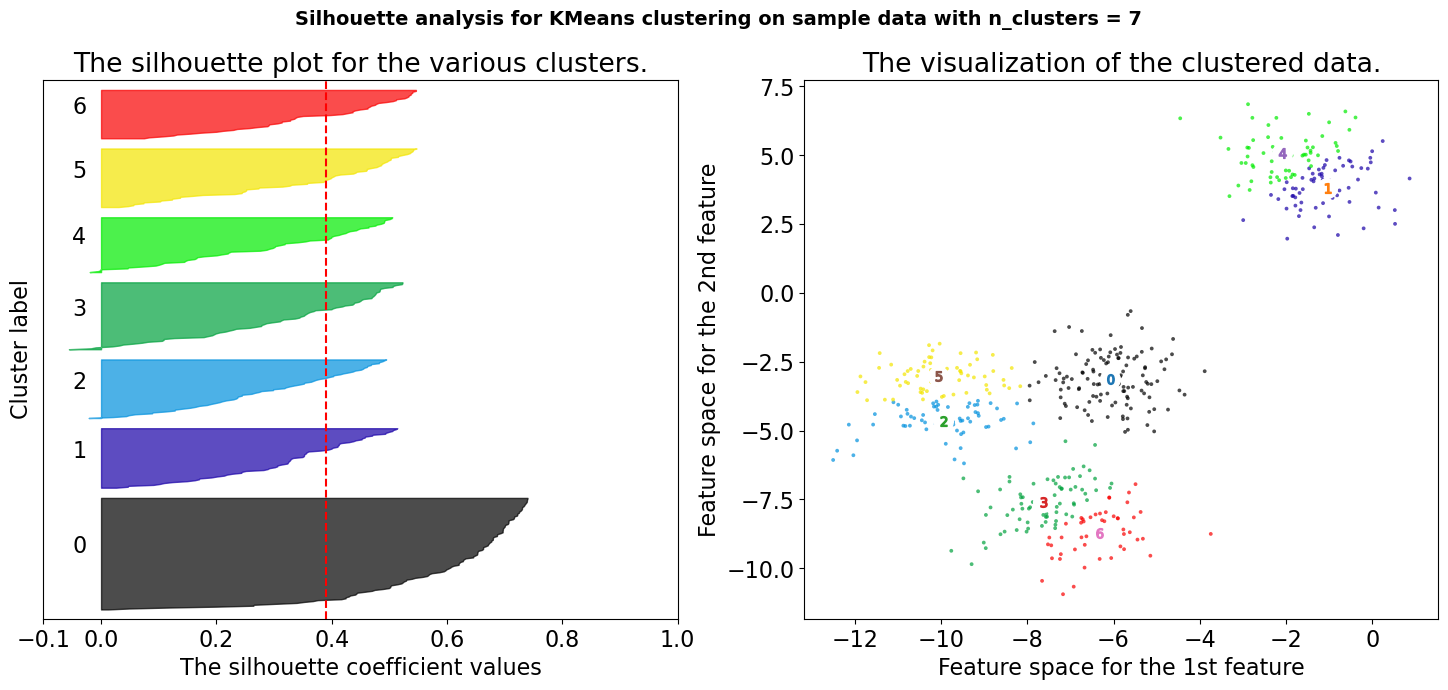

For n_clusters = 8 the average silhouette score is 0.331.


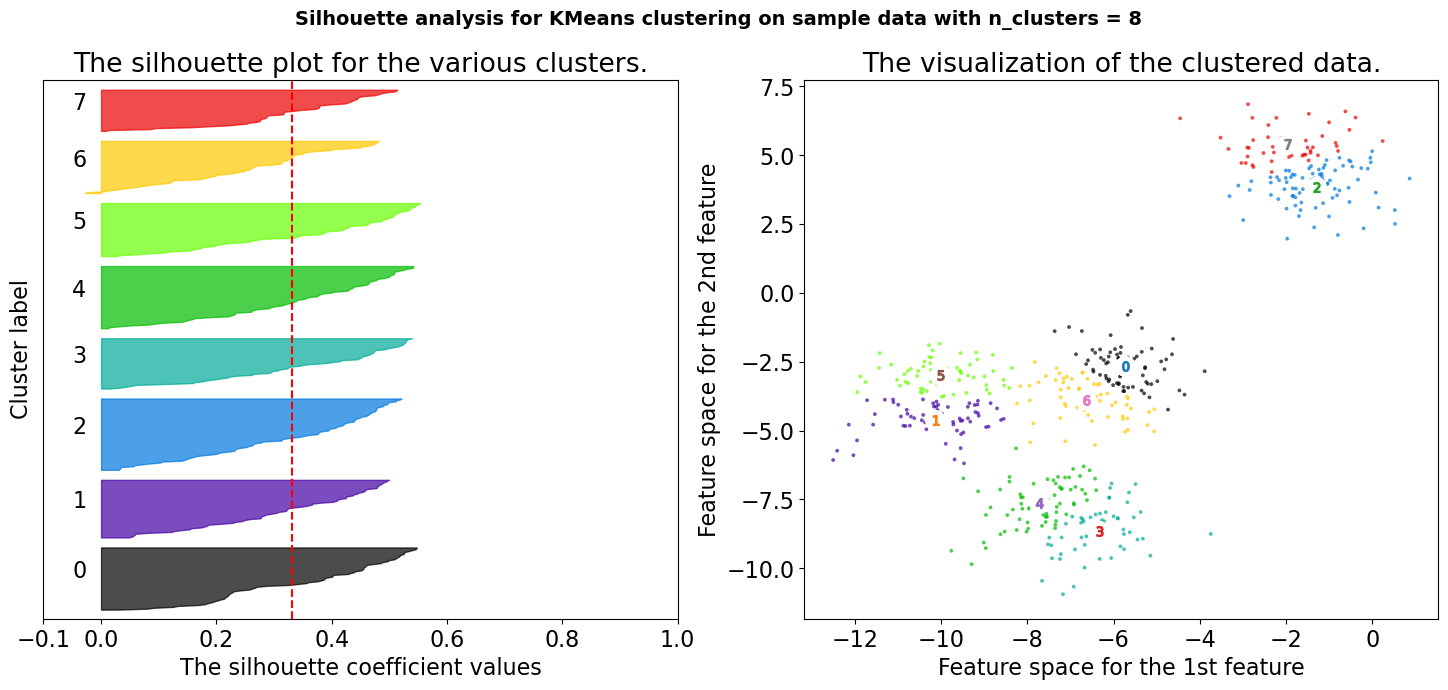

In [12]:
from helper import cluster_and_plot
for i in range(2,9):
    cluster_and_plot(X, i)